<a href="https://colab.research.google.com/github/ThomasMoming/Week4-NeuralNetworks/blob/Week_4/A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Library**

In [2]:
#importing the required libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa.display
import soundfile
import os
# matplotlib complains about the behaviour of librosa.display, so we'll ignore those warnings:
import warnings; warnings.filterwarnings('ignore')

**Feature Extraction // 特征函数**

**Load the Dataset and Compute Features**

In [8]:
#Emotions in the RAVDESS dataset
emotions_dict ={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

**Load pre-saved Dataset**

In [15]:
features=pd.read_csv('/content/drive/MyDrive/Audio_Data/week_4_featuresRavdess.csv',index_col=0)
emotions=pd.read_csv('/content/drive/MyDrive/Audio_Data/week_4_emotionsRavdess.csv',index_col=0)

In [30]:
custom_features=pd.read_csv('/content/drive/MyDrive/Audio_Data/custom_features.csv',index_col=0)
custom_emotions=pd.read_csv('/content/drive/MyDrive/Audio_Data/custom_emotions.csv',index_col=0)

custom_features.head()

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0.629311,0.661443,0.616044,0.623214,0.666405,0.679667,0.664542,0.635375,0.627684,0.635279,...,-1.953951,-2.450751,0.271979,-0.878340,-2.648299,-3.039664,-4.198112,-2.845568,-1.806264,-3.954085
1,0.741572,0.742542,0.704261,0.681250,0.636815,0.583002,0.573838,0.603838,0.642456,0.648376,...,3.355918,1.039297,0.573200,-1.277037,-0.347672,0.693700,-1.006875,0.757135,1.350927,-0.190830
2,0.656329,0.720322,0.656055,0.585045,0.624932,0.659373,0.606321,0.611708,0.668705,0.692176,...,-2.022536,-1.424291,-2.319406,-2.786681,-2.053423,-3.388133,-2.708896,-2.856830,-2.219221,-2.849264
3,0.680636,0.678979,0.667645,0.686727,0.742261,0.746659,0.744396,0.709447,0.719472,0.714002,...,-0.088898,-0.257014,-1.703997,-0.652201,-1.711466,-2.075417,-1.905586,-0.431647,-0.891223,-2.378582
4,0.607362,0.583233,0.579904,0.538367,0.480250,0.480554,0.461294,0.467565,0.555205,0.601437,...,1.444871,3.661883,4.542642,3.893767,6.261982,3.339123,3.645392,2.968026,2.770515,-0.710785


In [35]:
print(f'\nAudio samples represented: {custom_features.shape[0]}')
print(f'Numerical features extracted per sample: {custom_features.shape[1]}')
custom_features_df = pd.DataFrame(custom_features) # make it pretty for display
custom_emotions_df=pd.DataFrame(custom_emotions)


Audio samples represented: 8
Numerical features extracted per sample: 180


In [16]:
print(f'\nAudio samples represented: {features.shape[0]}')
print(f'Numerical features extracted per sample: {features.shape[1]}')
features_df = pd.DataFrame(features) # make it pretty for display
labels_df=pd.DataFrame(emotions)


Audio samples represented: 1440
Numerical features extracted per sample: 180


**Feature Scaling**

In [49]:
# We would usually use df.describe(), but it provides a bit of a mess of information we don't need at the moment.
def print_features(df):
    # Check chromagram feature values
    features_df_chromagram = df.iloc[:,:11]
    chroma_min = features_df_chromagram.min().min()
    chroma_max = features_df_chromagram.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    chroma_mean = features_df_chromagram.stack().mean()
    chroma_stdev = features_df_chromagram.stack().std()
    print(f'12 Chromagram features:       \
    min = {chroma_min:.3f}, \
    max = {chroma_max:.3f}, \
    mean = {chroma_mean:.3f}, \
    deviation = {chroma_stdev:.3f}')

    # Check mel spectrogram feature values
    features_df_melspectrogram = df.iloc[:,12:139]
    mel_min = features_df_melspectrogram.min().min()
    mel_max = features_df_melspectrogram.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    mel_mean = features_df_melspectrogram.stack().mean()
    mel_stdev = features_df_melspectrogram.stack().std()
    print(f'\n128 Mel Spectrogram features: \
    min = {mel_min:.3f}, \
    max = {mel_max:.3f}, \
    mean = {mel_mean:.3f}, \
    deviation = {mel_stdev:.3f}')

    # Check MFCC feature values
    features_df_mfcc = df.iloc[:,140:179]
    mfcc_min = features_df_mfcc.min().min()
    mfcc_max = features_df_mfcc.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    mfcc_mean = features_df_mfcc.stack().mean()
    mfcc_stdev = features_df_mfcc.stack().std()
    print(f'\n40 MFCC features:             \
    min = {mfcc_min:.3f},\
    max = {mfcc_max:.3f},\
    mean = {mfcc_mean:.3f},\
    deviation = {mfcc_stdev:.3f}')

print_features(features_df)

12 Chromagram features:           min = 0.310,     max = 1.000,     mean = 0.667,     deviation = 0.088

128 Mel Spectrogram features:     min = 0.000,     max = 149.208,     mean = 0.188,     deviation = 1.603

40 MFCC features:                 min = -1131.371,    max = 115.126,    mean = -15.072,    deviation = 100.103


In [48]:
print(custom_features.head())

          0         1         2         3         4         5         6  \
0  0.629311  0.661443  0.616044  0.623214  0.666405  0.679667  0.664542   
1  0.741572  0.742542  0.704261  0.681250  0.636815  0.583002  0.573838   
2  0.656329  0.720322  0.656055  0.585045  0.624932  0.659373  0.606321   
3  0.680636  0.678979  0.667645  0.686727  0.742261  0.746659  0.744396   
4  0.607362  0.583233  0.579904  0.538367  0.480250  0.480554  0.461294   

          7         8         9  ...       170       171       172       173  \
0  0.635375  0.627684  0.635279  ... -1.953951 -2.450751  0.271979 -0.878340   
1  0.603838  0.642456  0.648376  ...  3.355918  1.039297  0.573200 -1.277037   
2  0.611708  0.668705  0.692176  ... -2.022536 -1.424291 -2.319406 -2.786681   
3  0.709447  0.719472  0.714002  ... -0.088898 -0.257014 -1.703997 -0.652201   
4  0.467565  0.555205  0.601437  ...  1.444871  3.661883  4.542642  3.893767   

        174       175       176       177       178       179  
0 -2

In [47]:
print_features(custom_features_df)

12 Chromagram features:           min = 0.461,     max = 0.777,     mean = 0.661,     deviation = 0.065

128 Mel Spectrogram features:     min = 0.001,     max = 85.337,     mean = 2.606,     deviation = 6.642

40 MFCC features:                 min = -369.303,    max = 148.436,    mean = -5.763,    deviation = 56.117


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
# keep our unscaled features just in case we need to process them alternatively
features_scaled = features
features_scaled = scaler.fit_transform(features_scaled)

scaler = MinMaxScaler()
# keep our unscaled features just in case we need to process them alternatively
features_minmax = features
features_minmax = scaler.fit_transform(features_minmax)

In [19]:
print('\033[1m'+'Standard Scaling:\n'+'\033[0m')
features_scaled_df = pd.DataFrame(features_scaled)
print_features(features_scaled_df)

print('\n\n\033[1m'+'MinMax Scaling:\n'+'\033[0m')
features_minmax_df = pd.DataFrame(features_minmax)
print_features(features_minmax_df)

Standard Scaling:

12 Chromagram features:           min = -3.897,     max = 4.369,     mean = 0.000,     deviation = 1.000

128 Mel Spectrogram features:     min = -0.474,     max = 36.543,     mean = -0.000,     deviation = 1.000

40 MFCC features:                 min = -4.804,    max = 6.240,    mean = -0.000,    deviation = 1.000


MinMax Scaling:

12 Chromagram features:           min = 0.000,     max = 1.000,     mean = 0.478,     deviation = 0.145

128 Mel Spectrogram features:     min = 0.000,     max = 1.000,     mean = 0.014,     deviation = 0.060

40 MFCC features:                 min = 0.000,    max = 1.000,    mean = 0.414,    deviation = 0.170


In [37]:
# Standard Scaling (标准化)
print('\033[1m' + 'Standard Scaling for custom_features:\n' + '\033[0m')
scaler_standard = StandardScaler()
custom_features_scaled = scaler_standard.fit_transform(custom_features)
custom_features_scaled_df = pd.DataFrame(custom_features_scaled, columns=custom_features.columns)
print_features(custom_features_scaled_df)

# MinMax Scaling (归一化)
print('\n\n\033[1m' + 'MinMax Scaling for custom_features:\n' + '\033[0m')
scaler_minmax = MinMaxScaler()
custom_features_minmax = scaler_minmax.fit_transform(custom_features)
custom_features_minmax_df = pd.DataFrame(custom_features_minmax, columns=custom_features.columns)
print_features(custom_features_minmax_df)

Standard Scaling for custom_features:

12 Chromagram features:           min = -2.291,     max = 1.584,     mean = -0.000,     deviation = 1.006

128 Mel Spectrogram features:     min = -1.904,     max = 2.624,     mean = 0.000,     deviation = 1.000

40 MFCC features:                 min = -2.491,    max = 2.427,    mean = 0.000,    deviation = 1.002


MinMax Scaling for custom_features:

12 Chromagram features:           min = 0.000,     max = 1.000,     mean = 0.602,     deviation = 0.323

128 Mel Spectrogram features:     min = 0.000,     max = 1.000,     mean = 0.349,     deviation = 0.339

40 MFCC features:                 min = 0.000,    max = 1.000,    mean = 0.476,    deviation = 0.340


**The MLP Model for Classification**

In [20]:
from sklearn.model_selection import train_test_split
############# Unscaled test/train set #############
X_train80, X_test, y_train80, y_test = train_test_split(
    features,
    emotions,
    test_size=0.2,
    random_state=42
)

# Then further divide the train set into validation
# Note that here, to get 60%-20%, we'll need to divide the 80% train set from above to 75-25 split
# 0.8 * 0.25 = 0.2
X_train, X_validation, y_train, y_validation = train_test_split(
    X_train80,
    y_train80,
    test_size=0.25,
    random_state=42
)

############ Standard Scaled test/train set ###########
# The labels/classes (y_train, y_test) never change, keep old values
X_train_scaled80, X_test_scaled, _, _ = train_test_split(
    features_scaled,
    emotions,
    test_size=0.2,
    random_state=42
)

# Repeat to get validation, same as above
X_train_scaled, X_validation_scaled, _, _ = train_test_split(
    X_train_scaled80,
    y_train80,
    test_size=0.25,
    random_state=42
)

############# MinMax Scaled test/train set ###############
# The labels/classes (y_train, y_test) never change, keep old values
X_train_minmax80, X_test_minmax, _, _ = train_test_split(
    features_minmax,
    emotions,
    test_size=0.2,
    random_state=42
)

# And get validation set
X_train_minmax, X_validation_minmax, _, _ = train_test_split(
    X_train_minmax80,
    y_train80,
    test_size=0.25,
    random_state=42
)

**MLP Initialization**

In [21]:
from sklearn.neural_network import MLPClassifier

# Default 'off-the-shelf' MLP from sklearn
model = MLPClassifier(
    random_state = 42
)

# Use the split train test to train, we'll first use the unscaled parameters
model.fit(X_train, y_train)

print(f'Possible emotions predicted by model:{model.classes_}')
print(f'Unscaled MLP Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Unscaled MLP Model\'s accuracy on validation set is {100*model.score(X_validation, y_validation):.2f}%')



Possible emotions predicted by model:['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']
Unscaled MLP Model's accuracy on training set is 56.25%
Unscaled MLP Model's accuracy on validation set is 44.79%


In [22]:
# Fit the model again on the minmax scaled features
model.fit(X_train_minmax, y_train)

print(f'MinMax scaled MLP Model\'s accuracy on training set is {100*model.score(X_train_minmax, y_train):.2f}%')
print(f'MinMax sacled MLP Model\'s accuracy on validation set is {100*model.score(X_validation_minmax, y_validation):.2f}%\n')


# Fit the model again on the scaled features
model.fit(X_train_scaled, y_train)

print(f'Standard scaled MLP Model\'s accuracy on training set is {100*model.score(X_train_scaled, y_train):.2f}%')
print(f'Standard scaled MLP Model\'s accuracy on validation set is {100*model.score(X_validation_scaled, y_validation):.2f}%')

MinMax scaled MLP Model's accuracy on training set is 62.96%
MinMax sacled MLP Model's accuracy on validation set is 55.56%

Standard scaled MLP Model's accuracy on training set is 99.42%
Standard scaled MLP Model's accuracy on validation set is 64.93%


In [23]:
from sklearn.model_selection import GridSearchCV
from joblib import parallel_backend


# Now that we know standard scaling is best for our features, we'll use those for our training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled,
    emotions,
    test_size=0.2,
    random_state=42
)


# Initialize the MLP Classifier and choose parameters we want to keep constant
model = MLPClassifier(
    # tune batch size later
    batch_size=256,
    # keep random state constant to accurately compare subsequent models
    random_state=42
)

# Choose the grid of hyperparameters we want to use for Grid Search to build our candidate models
parameter_space = {
    # A single hidden layer of size between 8 (output classes) and 180 (input features) neurons is most probable
    # It's a bad idea at guessing the number of hidden layers to have
    # ...but we'll give 2 and 3 hidden layers a shot to reaffirm our suspicions that 1 is best
    'hidden_layer_sizes': [(180,), (300,),(100,50,)],
    'activation': ['relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.001, 0.01],
    #'epsilon': [1e-08, 0.1],
    'learning_rate': ['adaptive', 'constant']
}

# Create a grid search object which will store the scores and hyperparameters of all candidate models
grid = GridSearchCV(
    model,
    parameter_space,
    cv=10, # CV here shows how many fold of cross-validation we'll do
    n_jobs=-1,
    verbose=10)
# Fit the models specified by the parameter grid
# Note that, here we used the whole 80 training set because cross-validation holds out validation sets automatically
# So we won't be using 60-20 split, GridSearchCV will automatically do it
with parallel_backend('multiprocessing'):
    grid.fit(X_train, y_train)


# get the best hyperparameters from grid search object with its best_params_ attribute
print('Best parameters found:\n', grid.best_params_)

[CV 1/10; 1/48] START activation=relu, alpha=0.001, hidden_layer_sizes=(180,), learning_rate=adaptive, solver=sgd[CV 2/10; 1/48] START activation=relu, alpha=0.001, hidden_layer_sizes=(180,), learning_rate=adaptive, solver=sgd

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV 2/10; 1/48] END activation=relu, alpha=0.001, hidden_layer_sizes=(180,), learning_rate=adaptive, solver=sgd;, score=0.552 total time=  12.7s
[CV 3/10; 1/48] START activation=relu, alpha=0.001, hidden_layer_sizes=(180,), learning_rate=adaptive, solver=sgd
[CV 1/10; 1/48] END activation=relu, alpha=0.001, hidden_layer_sizes=(180,), learning_rate=adaptive, solver=sgd;, score=0.552 total time=  13.1s
[CV 4/10; 1/48] START activation=relu, alpha=0.001, hidden_layer_sizes=(180,), learning_rate=adaptive, solver=sgd
[CV 3/10; 1/48] END activation=relu, alpha=0.001, hidden_layer_sizes=(180,), learning_rate=adaptive, solver=sgd;, score=0.496 total time=  10.5s
[CV 5/10; 1/48] START activation=relu, alpha=0

In [39]:
# Now we know best parameters from the Hyperparameter tuning
# We can use them for the final model
model = MLPClassifier(
    activation='relu',
    solver='adam',
    alpha=0.001,
    batch_size=256,
    hidden_layer_sizes=(300,),
    learning_rate='adaptive',
    max_iter=1000, # I've found for this task, loss converges at ~1000 iterations
    random_state=42,
)

# In the final model, we can use the whole training dataset
model.fit(X_train, y_train)

print(f'MLP Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
# As we're done with hyperparameter tuning, we can check accuracy on test set
# Note that, up to this point, we did not touch the test set at all
print(f'MLP Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')



MLP Model's accuracy on training set is 99.65%
MLP Model's accuracy on test set is 71.88%


In [41]:
# 1. 使用原始的 custom_features 数据测试模型
print('\n\033[1m' + 'Testing on Original custom_features data:\n' + '\033[0m')
y_pred_custom_original = model.predict(custom_features)  # 预测原始数据
accuracy_custom_original = accuracy_score(custom_emotions, y_pred_custom_original)
print(f'MLP Model\'s accuracy on original custom_features is {100*accuracy_custom_original:.2f}%')

# 2. 使用标准化的 custom_features_standard 数据测试模型
print('\n\033[1m' + 'Testing on Standardized custom_features data:\n' + '\033[0m')
y_pred_custom_standard = model.predict(custom_features_scaled_df)  # 预测标准化数据
accuracy_custom_standard = accuracy_score(custom_emotions, y_pred_custom_standard)
print(f'MLP Model\'s accuracy on standardized custom_features is {100*accuracy_custom_standard:.2f}%')

# 3. 使用归一化的 custom_features_minmax 数据测试模型
print('\n\033[1m' + 'Testing on MinMax Scaled custom_features data:\n' + '\033[0m')
y_pred_custom_minmax = model.predict(custom_features_minmax_df)  # 预测归一化数据
accuracy_custom_minmax = accuracy_score(custom_emotions, y_pred_custom_minmax)
print(f'MLP Model\'s accuracy on MinMax scaled custom_features is {100*accuracy_custom_minmax:.2f}%')


Testing on Original custom_features data:

MLP Model's accuracy on original custom_features is 12.50%

Testing on Standardized custom_features data:

MLP Model's accuracy on standardized custom_features is 50.00%

Testing on MinMax Scaled custom_features data:

MLP Model's accuracy on MinMax scaled custom_features is 25.00%


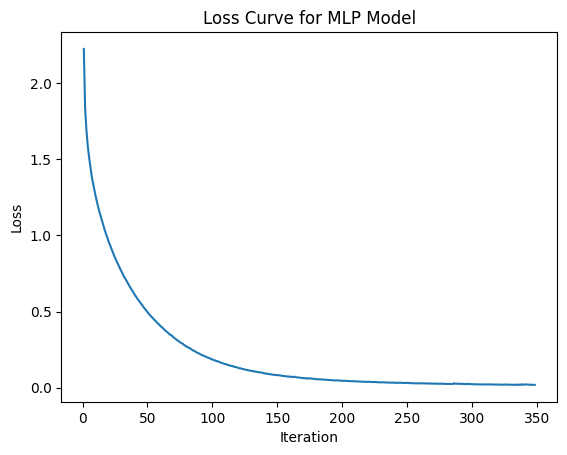

In [25]:
plt.figure()
plt.plot([num for num in range(1,model.n_iter_ +1)], model.loss_curve_)
plt.title('Loss Curve for MLP Model')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

**The Confusion Matrix**

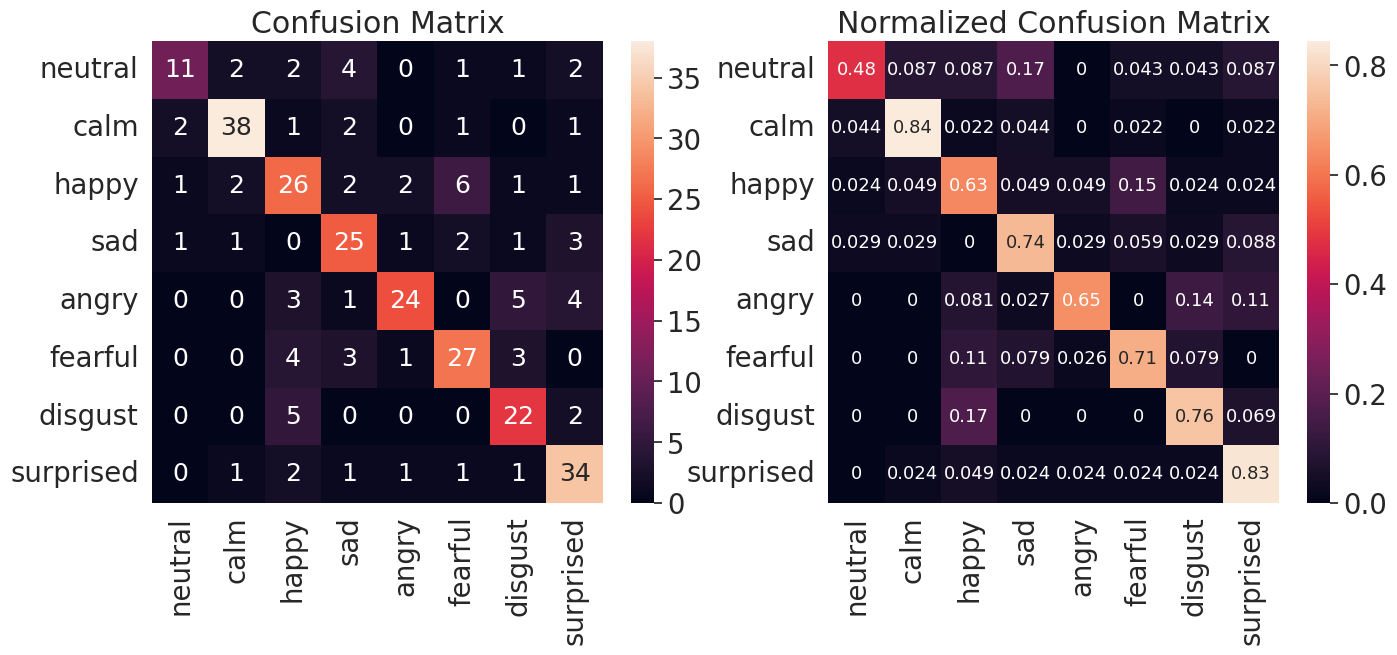

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sn # I like seaborn's confusion matrix over sklearn's default

# get predictions on test set
test_emotion_predictions = model.predict(X_test)
test_emotion_groundtruth = y_test

# set labels for matrix axes from emotions
emotion_list =['neutral','calm','happy','sad','angry','fearful','disgust','surprised']
emotion_name = [emotion for emotion in emotion_list]

# build confusion matrix and normalized confusion matrix
conf_matrix = confusion_matrix(test_emotion_groundtruth, test_emotion_predictions, labels=emotion_list)
conf_matrix_norm = confusion_matrix(test_emotion_groundtruth, test_emotion_predictions,normalize='true', labels=emotion_list)



# make a confusion matrix with labels using a DataFrame
confmatrix_df = pd.DataFrame(conf_matrix, index=emotion_name, columns=emotion_name)
confmatrix_df_norm = pd.DataFrame(conf_matrix_norm, index=emotion_name, columns=emotion_name)

# plot confusion matrices
plt.figure(figsize=(16,6))
sn.set(font_scale=1.8) # emotion label and title size
plt.subplot(1,2,1)
plt.title('Confusion Matrix')
sn.heatmap(confmatrix_df, annot=True, annot_kws={"size": 18}) #annot_kws is value font
plt.subplot(1,2,2)
plt.title('Normalized Confusion Matrix')
sn.heatmap(confmatrix_df_norm, annot=True, annot_kws={"size": 13}) #annot_kws is value font

plt.show()

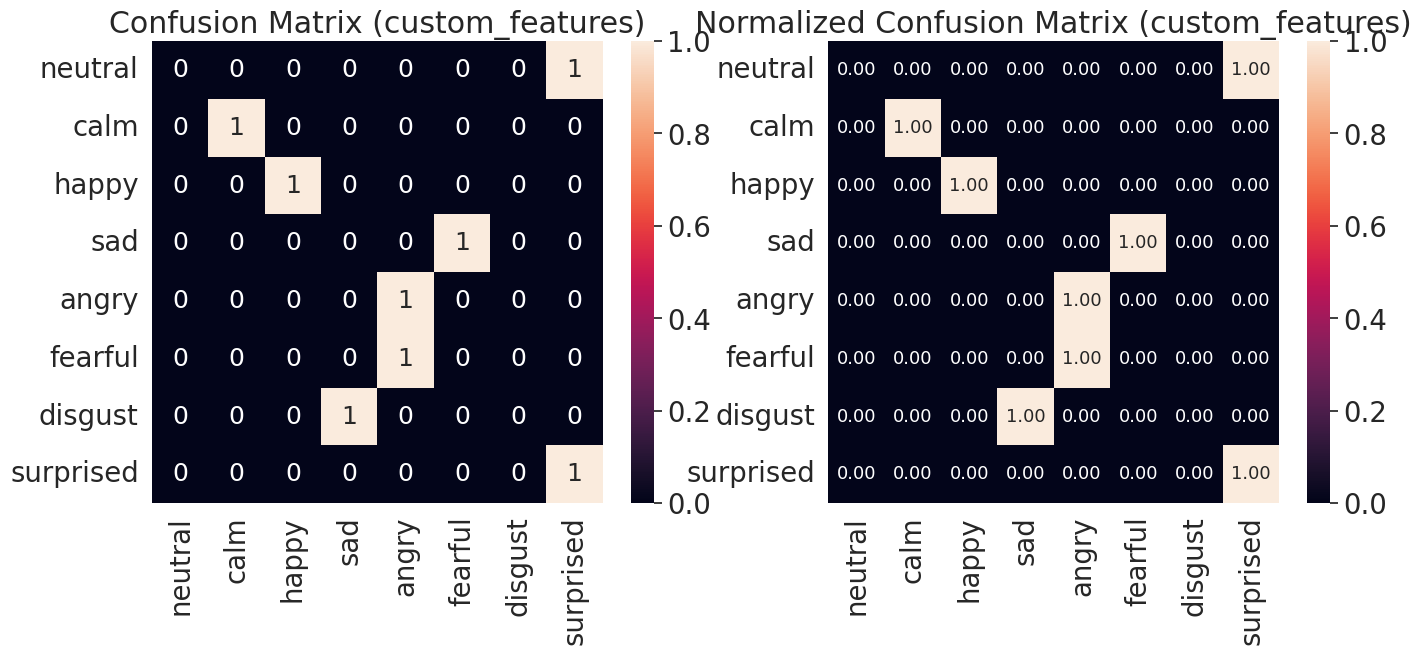

In [46]:
# 预测 custom_features_standard 数据集
y_pred_custom_standard = model.predict(custom_features_scaled_df)  # 假设 custom_features_scaled_df 是标准化后的特征
test_emotion_groundtruth = custom_emotions  # custom_emotions 是真实的情感标签

# 定义情感标签名称
emotion_list = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']
emotion_name = [emotion for emotion in emotion_list]

# 构建混淆矩阵和标准化混淆矩阵
conf_matrix_custom = confusion_matrix(test_emotion_groundtruth, y_pred_custom_standard, labels=emotion_list)
conf_matrix_custom_norm = confusion_matrix(test_emotion_groundtruth, y_pred_custom_standard, normalize='true', labels=emotion_list)

# 使用 DataFrame 来构建带有标签的混淆矩阵
confmatrix_df_custom = pd.DataFrame(conf_matrix_custom, index=emotion_name, columns=emotion_name)
confmatrix_df_custom_norm = pd.DataFrame(conf_matrix_custom_norm, index=emotion_name, columns=emotion_name)




# 绘制混淆矩阵
plt.figure(figsize=(16, 6))
sn.set(font_scale=1.8)  # 设置字体大小
plt.subplot(1, 2, 1)
plt.title('Confusion Matrix (custom_features)')
sn.heatmap(confmatrix_df_custom, annot=True, annot_kws={"size": 18}, fmt='d', )  # 原始混淆矩阵
plt.subplot(1, 2, 2)
plt.title('Normalized Confusion Matrix (custom_features)')
sn.heatmap(confmatrix_df_custom_norm, annot=True, annot_kws={"size": 13}, fmt='.2f', )  # 标准化混淆矩阵



plt.show()

**Precision, Recall, F-Score**

In [27]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

y_pred = model.predict(X_test)
print(f'Test Set Accuracy score =  {100*accuracy_score(y_test, y_pred):.3f}%') #same as model.score(X_test, y_test)
print(f'Test Set Precision score =  {100*precision_score(y_test, y_pred, average="macro"):.3f}%')
print(f'Test Set Recall score =  {100*recall_score(y_test, y_pred, average="macro"):.3f}%')
print(f'Test Set F-score score =  {100*f1_score(y_test, y_pred, average="macro"):.3}%')

Test Set Accuracy score =  71.875%
Test Set Precision score =  72.101%
Test Set Recall score =  70.490%
Test Set F-score score =  70.7%


**K-Fold Cross-Validation**

In [28]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(
    n_splits=10,
    random_state=42,
    shuffle=True
)

scores = []
X_train=pd.DataFrame(X_train)
y_train=pd.DataFrame(y_train)
for train_indices, validation_indices in kfold.split(X_train,y_train):



    train_x=X_train.iloc[train_indices]
    train_y=y_train.iloc[train_indices]

    validation_x=X_train.iloc[validation_indices]
    validation_y=y_train.iloc[validation_indices]
    # fit model to training fold
    model.fit(train_x, train_y)
    # score the model on validation fold
    scores.append(model.score(validation_x, validation_y))

print('KFold CV scores for MLP:');[print(f'{(100*score):.2f}%') for score in scores]
print(f'Mean score of KFold CV for MLP: {100*np.mean(scores):.2f}% ± {100*np.std(scores):.2f}%')

KFold CV scores for MLP:
65.52%
65.52%
65.22%
63.48%
73.91%
60.87%
65.22%
66.09%
62.61%
69.57%
Mean score of KFold CV for MLP: 65.80% ± 3.48%


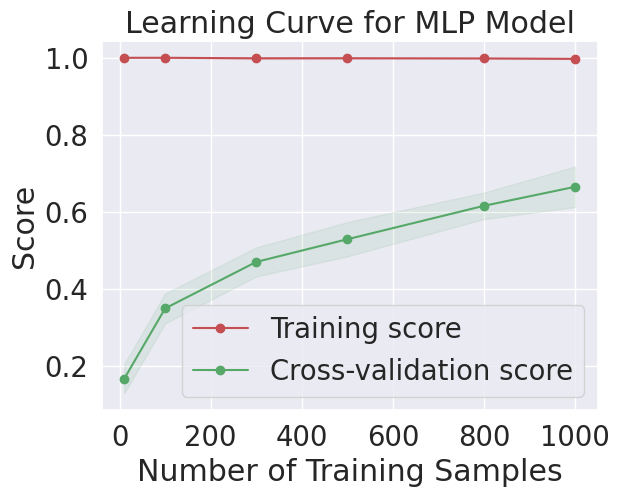

In [29]:
from sklearn.model_selection import learning_curve

# Build learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model,
    X=X_train,
    y=y_train,
    cv=10,
    shuffle=True,
    random_state=42,
    n_jobs=4,
    # We have (0.8*1440)/10 = 115/1150 training samples, 1035/1150 test samples
    train_sizes=[10,100,300,500,800, 1000] # bounded at 1035 for this dataset for 10-fold cv
)
# Get errors for learning curve
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.title('Learning Curve for MLP Model')
plt.xlabel('Number of Training Samples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.show()